In [1]:
# Import libraries for data handling, regex, and machine learning
import pandas as pd
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Load dataset from CSV file
df = pd.read_csv('malicious_phish.csv')  # file must be in same folder

# Keep only url and type columns
df = df[['url', 'type']]

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows with missing url or type
df.dropna(subset=['url', 'type'], inplace=True)

# Convert urls to lowercase for consistency
df['url'] = df['url'].str.lower()


In [3]:
# Define function to extract features from url
def extract_features(url):
    features = {}
    # Length of url
    features['url_length'] = len(url)
    # Count digits in url
    features['num_digits'] = sum(c.isdigit() for c in url)
    # Count special characters @ - ? =
    features['num_special_chars'] = len(re.findall(r'[@\-?=]', url))
    # Flag if url has ip address
    features['has_ip'] = 1 if re.match(r'http[s]?://\d+\.\d+\.\d+\.\d+', url) else 0
    return features

In [4]:
# Apply feature extraction to all urls
feature_df = df['url'].apply(extract_features).apply(pd.Series)

# Feature matrix
X = feature_df

# Target labels, phishing = 1, else = 0
y = df['type'].map(lambda x: 1 if x == 'phishing' else 0)

# Print unique label values
print(df['type'].unique())


['phishing' 'benign' 'defacement' 'malware']


In [5]:
# Split data into train and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


In [6]:
# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# Predict on test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Model Evaluation Metrics:
Accuracy : 0.8605
Precision: 0.6540
Recall   : 0.1046
F1 Score : 0.1803


In [8]:
# Get feature importances from model
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Print sorted feature importances
print("\nFeature Importances:")
print(importances.sort_values(ascending=False))



Feature Importances:
url_length           0.481982
num_digits           0.284141
num_special_chars    0.219739
has_ip               0.014138
dtype: float64


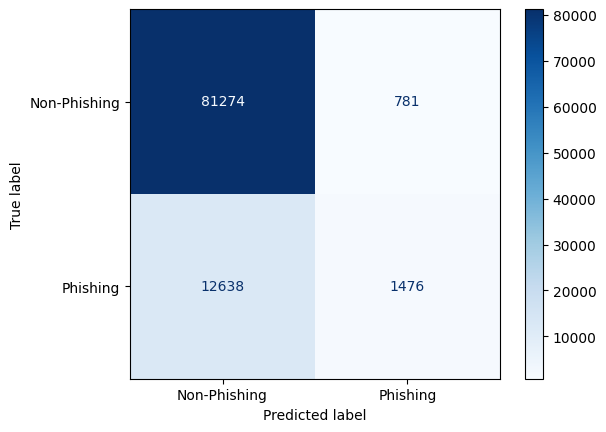

In [9]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Phishing', 'Phishing'])
disp.plot(cmap='Blues', values_format='d')  # 'd' formats values as integers